In [18]:
import polars as pl
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

%matplotlib inline

In [4]:
time_series = time_series_data()

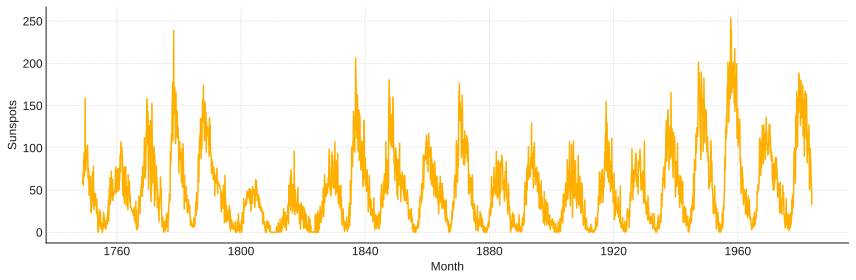

In [6]:
time_series.plot_data()

In [11]:
stationary.describe()

statistic,Month,Sunspots
str,str,f64
"""count""","""2820""",2820.0
"""null_count""","""0""",0.0
"""mean""","""1866-06-16 10:38:17.873000""",51.265957
"""std""",null,43.448971
"""min""","""1749-01-01""",0.0
"""25%""","""1807-10-01""",15.7
"""50%""","""1866-07-01""",42.0
"""75%""","""1925-03-01""",74.9
"""max""","""1983-12-01""",253.8


In [5]:
stationary = time_series.data

<function matplotlib.pyplot.show(close=None, block=None)>

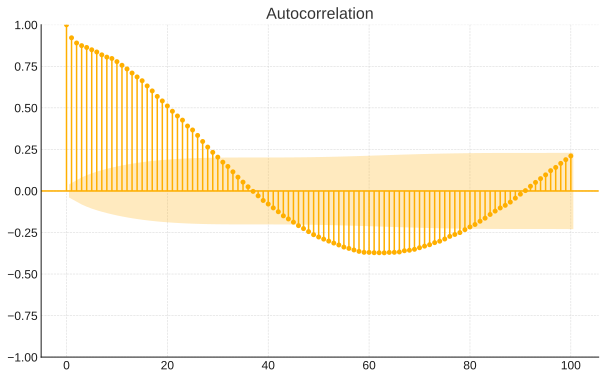

In [13]:
plot_acf(stationary["Sunspots"], lags=100, alpha=0.037)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

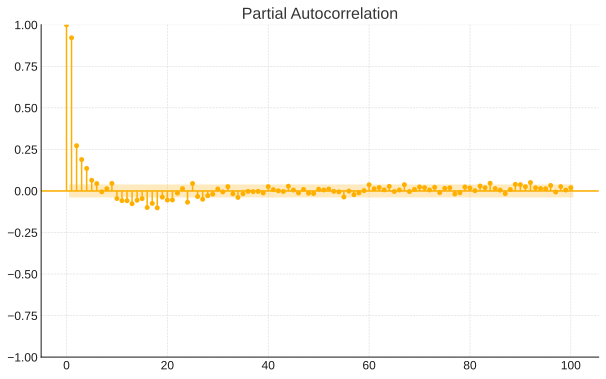

In [14]:
plot_pacf(stationary["Sunspots"], lags=100, alpha=0.037)
plt.show

In [37]:
# Perform ADF test on stationary data
adf_result = adfuller(stationary["Sunspots"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -9.567667511913076
p-value: 2.333452143866306e-16


In [40]:
model_ma = ARIMA(stationary["Sunspots"].to_pandas(), order=(2, 0, 0))
ma_fit = model_ma.fit()

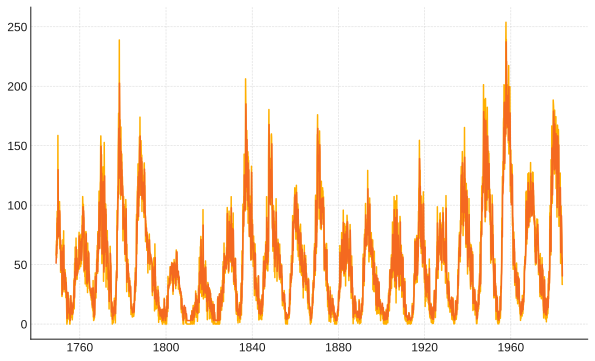

                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -11858.250
Date:                Thu, 07 Nov 2024   AIC                          23724.500
Time:                        13:24:22   BIC                          23748.278
Sample:                             0   HQIC                         23733.079
                               - 2820                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2659      6.806      7.532      0.000      37.925      64.606
ar.L1          0.6704      0.014     48.552      0.000       0.643       0.697
ar.L2          0.2722      0.013     20.287      0.0

In [44]:
# Plot original data and forecast
plt.plot(stationary["Month"], stationary["Sunspots"], label="Original Data")
plt.plot(stationary["Month"], ma_fit.fittedvalues, label="AR(2) Fitted Values")
plt.show()

# Display summary
print(ma_fit.summary())